# 0 Basic

## 0.0 Descriptions

## 0.1 References




**Original Dataset Source**

* [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

---

**Refered Kernels**

* [House Price Prediction EDA (updated 2019.03.12)](https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12)

* [2019 ML month 2nd baseline 커널](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)

---

**Refered Links**

* [King County Home Sales: Analysis and the limitations of a multiple regression model](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html)

## 0.2 Modules

In [1]:
import pandas as pd

## cmd+m+h ; shortcuts

In [2]:
# Analyzing
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Others
import warnings 
warnings.filterwarnings('ignore')

## 0.3 Datas

In [3]:
## Data Links
url_train = 'https://raw.githubusercontent.com/ehpyeon/kaggle/master/%5B1903%5DHouse_Prediction_KR/train.csv'
url_test = "https://raw.githubusercontent.com/ehpyeon/kaggle/master/%5B1903%5DHouse_Prediction_KR/test.csv"
## Save to Var
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)
all = pd.concat([train,test],axis=0)
## Checking
print("1.train Shape: ",train.shape)
print("2.test Shape: ",test.shape)
print("3.all Shape: ",all.shape,"\n")
print("test features: ",test.columns)
print("target feature: ",set(train.columns)-set(test.columns))

1.train Shape:  (15035, 21)
2.test Shape:  (6468, 20)
3.all Shape:  (21503, 21) 

test features:  Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
target feature:  {'price'}


# 1 EDA

## 1.0 Feature Descriptions
- ID : Numbers to identify houses
- date : Date to buy the house
- bedrooms: Numbers of bedrooms
- bathrooms: Numbers of bathrooms
- sqft_living: 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유뮤(a.k.a 리버뷰)
- view : Has been viewed
- condition : 집의 전반적인 상태
- grade : King Country gradinf 시스템 기준으로 매긴 집의 등급
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면 변화가 있을 수 있음)
- sqft_lot15: 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면 변화가 있을 수 있다.)
- lot/living 이런걸 변수로 만들 수 있다.
### Target Feature
- price : price of house at the 'date' to buy 

## 1.1 Overall

### 1.1.0 Missing value

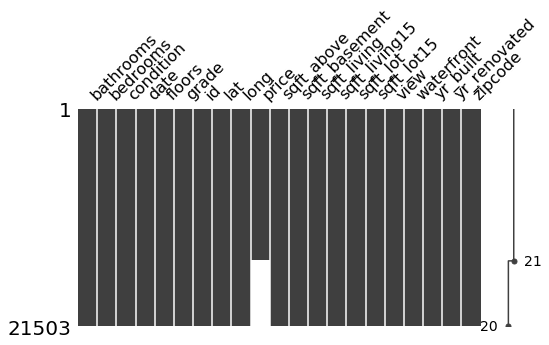

In [4]:
# Check with graph
msno.matrix(all,figsize=(8,4))

In [5]:
# Check with numbers
all.isnull().sum()

bathrooms           0
bedrooms            0
condition           0
date                0
floors              0
grade               0
id                  0
lat                 0
long                0
price            6468
sqft_above          0
sqft_basement       0
sqft_living         0
sqft_living15       0
sqft_lot            0
sqft_lot15          0
view                0
waterfront          0
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64

## 1.2 Each Features

### 1.2.0 Features grouping

1 target : price

2 year : date, yar_built, yr_renovated

3 sqft : above, basement, living, living15, lot, lot15

4.level : grade, condition, view, waterfront

5.room : bathrooms, bedrooms

6.location : lat, long, zipcode

7.other : floors, id

### 1.2.1 target : price


#### State

In [6]:
train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

* Large gaps between mean and 50% value. That is, normalization is needed

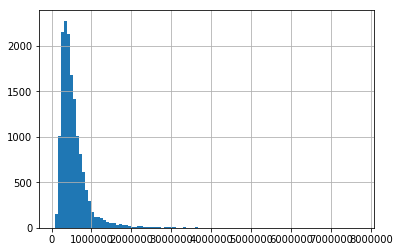

In [7]:
train['price'].hist(bins=100)

* right skewed. There are outliers

#### Normalizing

In [8]:
#Managing skewed 1 : Nomalizatio


In [9]:
# Managing skewed 1 : Removing Top 10$

### 1.2.2 year : date, yr_built, yr_renovated

In [10]:
# Local Date Functions
## Divide date values 
def divide_date(x):
  return x[:8]

## divide year values
def divide_year(x):
  return x[:4]

## divide month values
def divide_month(x):
  return x[4:6]

## divide day values
def divide_day(x):
  return x[6:8]

## divide year and month values
def divide_yearmonth(x):
  return x[:6]


In [11]:
all['year'] = all['date'].apply(lambda x: divide_year(x))
all['month'] = all['date'].apply(lambda x: divide_month(x))
all['day'] = all['date'].apply(lambda x: divide_day(x))
all['yearmonth'] = all['date'].apply(lambda x: divide_yearmonth(x))
train['year'] = train['date'].apply(lambda x: divide_year(x))
train['month'] = train['date'].apply(lambda x: divide_month(x))
train['day'] = train['date'].apply(lambda x: divide_day(x))
train['yearmonth'] = train['date'].apply(lambda x: divide_yearmonth(x))

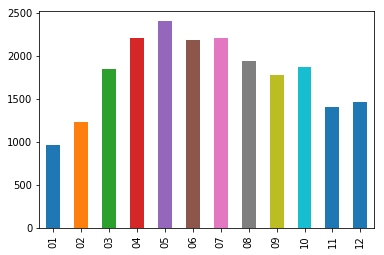

In [12]:
all.head()
all.month.value_counts().sort_index(axis=0).plot(kind='bar')


#### - Year

In [13]:
all['date'].apply(lambda x: x[:6]).value_counts().sort_index()
## 이건 좀 이해가 안감...

201405    1768
201406    2180
201407    2211
201408    1937
201409    1774
201410    1873
201411    1408
201412    1459
201501     969
201502    1234
201503    1851
201504    2204
201505     635
Name: date, dtype: int64

In [14]:
print(all.groupby('yearmonth')['price'].mean())

yearmonth
201405    549649.856230
201406    549902.546667
201407    546033.214918
201408    533536.653196
201409    532016.436838
201410    535156.146747
201411    523098.199796
201412    531244.522908
201501    526782.397974
201502    510550.813539
201503    546050.748462
201504    562234.612459
201505    576398.908482
Name: price, dtype: float64


- 일단 여기서 파악한 것은 2014년 5월~2015년 5월 정렬되어 있다는 것

In [15]:
# Date
all['date'] = all['date'].apply(lambda x:x[0:8])
train['date'] = train['date'].apply(lambda x:x[0:8])

In [16]:
# Date_year
all['date_year'] = all['date'].apply(lambda x:x[:4])

# Date_month
all['date_month'] = all['date'].apply(lambda x:x[4:6])

# Date_day
all['date_day'] = all['date'].apply(lambda x:x[6:8])

# Date_year_month
all['date_year_month'] = all['date'].apply(lambda x:x[0:6])

In [17]:
all['date_year_month'].nunique() 
## unique의 갯수를 구하는 것.

13

- 뒤에 붙어 있는 T000000은 제거. 앞부분 8자리 남겨두기

- 나중에 date_year, date_month, date_day 모두 만들어줘야 겠다.

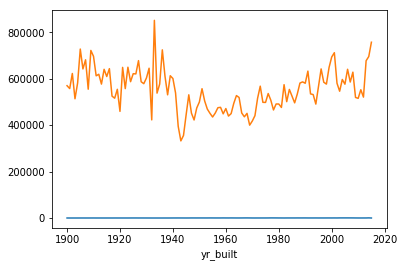

In [18]:
all['yr_built'].value_counts().sort_index().plot()
train.groupby('yr_built')['price'].agg('mean').plot(kind="line")

In [19]:
all['yr_renovated'].value_counts().sort_index()
print(all[all['yr_renovated']==0].price.mean())
print(all[all['yr_renovated']!=0].price.mean())

529753.7629825049
790159.2519809826


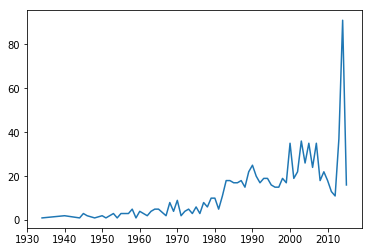

In [20]:
all[all['yr_renovated']!=0]['yr_renovated'].value_counts().sort_index().plot()

### 1.2.3 sqft : above, basement, living, living15, lot, lot15

#### sqft_living
- 주거 공간의 평방피트(면적)
- 실제 사용면적을 의미
- 1 sqlf = 0.0281평
- 1000sqlf = 28~32평

AxesSubplot(0.125,0.125;0.775x0.755)
count    21503.000000
mean      2081.441334
std        918.669624
min        290.000000
25%       1430.000000
50%       1914.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


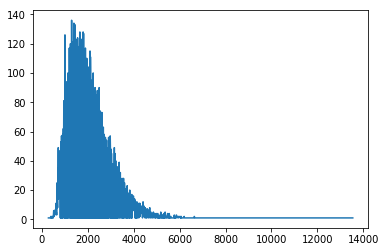

In [21]:
all['sqft_living'].describe()
print(all['sqft_living'].value_counts().sort_index(axis=0).plot())
print(all['sqft_living'].describe())


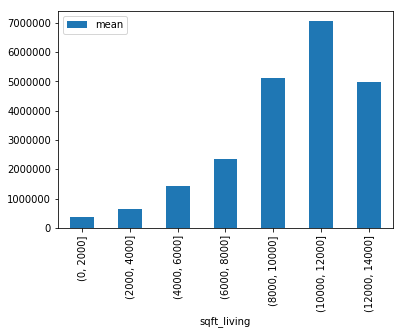

In [22]:
bins = pd.cut(all['sqft_living'],[0,2000,4000,6000,8000,10000,12000,14000])
all.groupby(bins)['price'].agg(['mean']).plot(kind='bar')

#### sqft_lot

#### sqft_above

#### sqft_basement

#### sqft_living15

#### sqft_lot15

### 1.2.4 level : grade, condition, view, waterfront


### 1.2.5 room : bathrooms, bedrooms

#### Bedrooms

AxesSubplot(0.125,0.125;0.775x0.755)
bedrooms
0        4
1      133
2     1931
3     6835
4     4797
5     1108
6      188
7       22
8       10
9        5
10       2
Name: price, dtype: int64


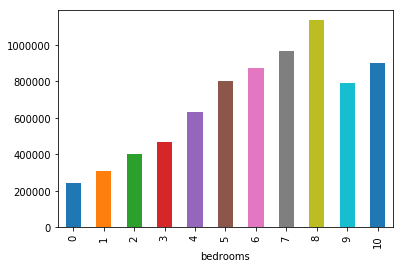

In [23]:
## Bedrooms
print(train.groupby('bedrooms')['price'].mean().plot(kind='bar'))
print(train.groupby('bedrooms')['price'].count())

In [24]:
train[train.bedrooms == 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yearmonth
9280,9280,20140814,1148000.0,10,5.25,4590,10920,1.0,0,2,...,0,98004,47.5861,-122.113,2730,10400,2014,08,14,201408
10575,10575,20141029,650000.0,10,2.00,3610,11914,2.0,0,0,...,0,98006,47.5705,-122.175,2040,11914,2014,10,29,201410


#### Bathrooms

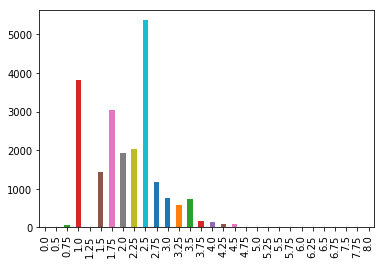

In [87]:
all['bathrooms'].value_counts().sort_index(axis=0).plot(kind="bar")


In [96]:
all['sqft_living'].value_counts().sort_index(axis=0)
all.groupby(pd.cut(all['sqft_living'],14))['price'].agg(['mean','count','sum'])

,mean,count,sum
sqft_living,,,
"(276.75, 1236.429]",3.209415e+05,2360,7.574221e+08
"(1236.429, 2182.857]",4.258860e+05,6931,2.951816e+09
"(2182.857, 3129.286]",6.188426e+05,3889,2.406679e+09
"(3129.286, 4075.714]",9.084229e+05,1365,1.239997e+09
"(4075.714, 5022.143]",1.359426e+06,346,4.703613e+08
"(5022.143, 5968.571]",1.781033e+06,99,1.763223e+08
"(5968.571, 6915.0]",2.073054e+06,25,5.182635e+07
"(6915.0, 7861.429]",2.657771e+06,12,3.189325e+07
"(7861.429, 8807.857]",4.449600e+06,3,1.334880e+07


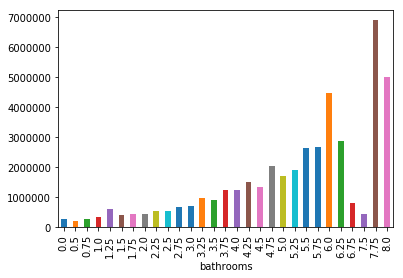

In [26]:
train.groupby('bathrooms')['price'].mean().plot(kind='bar')

### 1.2.6 location : lat, long, zipcode


70
70


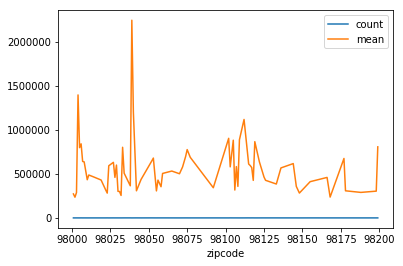

In [84]:
print(len(all['zipcode'].unique()))
print(all['zipcode'].nunique())
train.groupby('zipcode')['price'].agg(['count','mean']).plot()

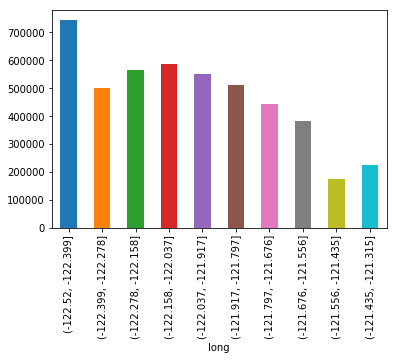

In [28]:
long_cut = pd.cut(train['long'],10)
train.groupby(long_cut)['price'].mean().sort_index().plot(kind='bar')

### 1.2.7 other : id, floors

# 2 Feature Engineering

## 2.1 Base

### 2.1.0 Global User Functions

In [82]:
def categorize(data,*variables):
  for x in variables:
    data[x] = data.astype('category')
    data = pd.concat([data,pd.get_dummies(data[x],prefix=x,drop_first=True)], axis=1)
    data = data.drop([x],axis=1)
  return data
  

In [81]:
def logarize(data,*variables):
  for x in variables :
    data['log_{}'.format(x)] = np.log(df_all[x])
    data.drop(x,axis=1,inplace=True)
  return data

In [77]:
def binarize(data,*variables):
  for x in variables :
    data['{}_binarized'.format(x)] = [(0 if x== 0 else 1) for x in data[x]]
    data.drop([x], axis=1, inplace = True)
  return data

In [79]:
def standardize(data, *variables):
  for x in variables:
    data['{}_standardized'.format(x)] = minmax_scale(data[x])
    data.drop([x],axis=1,inplace=True)
  return data

In [53]:
def pricehist(data, x, type):
    data = data[data['price'].isnull()==False] #If the dataset is concated with train and test datas, we sholud get rid of test data which don't have target feature('price')
    if data[x].nunique() > 30:
        data.groupby(pd.cut(data[x],30))['price'].mean().sort_index().plot(kind=type,color=(0.2,0.4,0.6,0.6))
    else :
        data.groupby([x])['price'].mean().sort_index().plot(kind=type,color=(0.2,0.4,0.6,0.6))

  

In [0]:
def pricehist2(data, x):
  data = data[data['price'].isnull()==False] #If the dataset is concated with train and test datas, we sholud get rid of test data which don't have target feature('price')
  data.groupby([x])['price'].mean().sort_index().plot(kind='line',color=(0.2,0.4,0.6,0.6))



In [0]:
def pricehist3(df_all,x):
    df_train = df_all[df_all['price'].isnull()==False]
    df_train.groupby([x])['price'].mean().sort_index().plot(kind='line',color=(0.2,0.4,0.6,0.6))

In [80]:
def quantilecut(data,x,n) :
  data['{}_cut'.format(x)] = pd.qcut(data[x],25,labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25'])
  data = categorize(data,'{}_cut'.format(x))
  return data

In [0]:
def grouping(data, x, n):
  return pd.cut(data[x],n)

In [97]:
quantilecut(all,'sqft_living',25)

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_living_cut_5.25,sqft_living_cut_5.5,sqft_living_cut_5.75,sqft_living_cut_6.0,sqft_living_cut_6.25,sqft_living_cut_6.5,sqft_living_cut_6.75,sqft_living_cut_7.5,sqft_living_cut_7.75,sqft_living_cut_8.0
0,1.00,3,3,20141013,1.0,7,0,47.5112,-122.257,221900.0,...,0,0,0,0,0,0,0,0,0,0
1,1.00,2,3,20150225,1.0,6,1,47.7379,-122.233,180000.0,...,0,0,0,0,0,0,0,0,0,0
2,2.00,3,3,20150218,1.0,8,2,47.6168,-122.045,510000.0,...,0,0,0,0,0,0,0,0,0,0
3,2.25,3,3,20140627,2.0,7,3,47.3097,-122.327,257500.0,...,0,0,0,0,0,0,0,0,0,0
4,1.50,3,3,20150115,1.0,7,4,47.4095,-122.315,291850.0,...,0,0,0,0,0,0,0,0,0,0
5,2.50,3,3,20150403,1.0,8,5,47.6007,-122.145,662500.0,...,0,0,0,0,0,0,0,0,0,0
6,1.00,2,4,20140527,1.0,7,6,47.6900,-122.292,468000.0,...,0,0,0,0,0,0,0,0,0,0
7,1.00,3,4,20140528,1.5,7,7,47.7558,-122.229,310000.0,...,0,0,0,0,0,0,0,0,0,0
8,1.75,3,4,20141007,1.0,7,8,47.6127,-122.045,400000.0,...,0,0,0,0,0,0,0,0,0,0
9,2.00,5,3,20150312,1.5,7,9,47.6700,-122.394,530000.0,...,0,0,0,0,0,0,0,0,0,0


hello


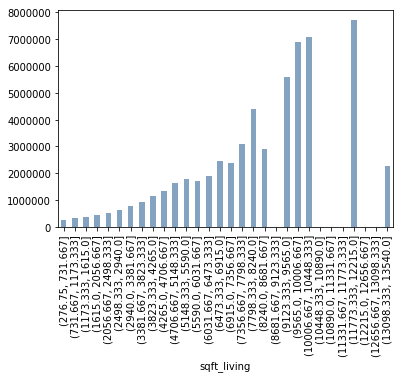

In [54]:
pricehist(all,"sqft_living","bar")


### 2.1.1 Local User Functions

In [55]:
# Date
def yearmonth(x) :
  return x[:6]

## 2.2 Changing Features

### 2.2.0 Price

### 2.2.1 Date
- yyyymm 으로 categorize 
- day 활용은 아직 없음

In [56]:
print(all['date'].apply(lambda x : yearmonth(x)).value_counts().sort_index(axis=0))
all['yearmonth'] = all.date.apply(lambda x : yearmonth(x))
all.columns

201405    1768
201406    2180
201407    2211
201408    1937
201409    1774
201410    1873
201411    1408
201412    1459
201501     969
201502    1234
201503    1851
201504    2204
201505     635
Name: date, dtype: int64


Index(['bathrooms', 'bedrooms', 'condition', 'date', 'floors', 'grade', 'id',
       'lat', 'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront',
       'yr_built', 'yr_renovated', 'zipcode', 'year', 'month', 'day',
       'yearmonth', 'date_year', 'date_month', 'date_day', 'date_year_month'],
      dtype='object')

### 2.2.2 Bedrooms
- 선형 추세
- 그대로 씀

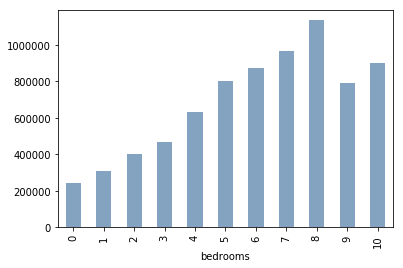

In [57]:
pricehist(all,'bedrooms','bar')

### 2.2.3 Bathrooms
- 선형추세
- 그대로 씀?
- 6 이상을 처리해 줘야 할까?

In [60]:
all.groupby(['bathrooms'])['price'].agg(['count','mean']).sort_index()

,count,mean
bathrooms,,
0.00,4,2.852500e+05
0.50,3,2.123333e+05
0.75,45,2.812389e+05
1.00,2675,3.469929e+05
1.25,5,6.082900e+05
1.50,1009,4.052911e+05
1.75,2112,4.516214e+05
2.00,1357,4.628095e+05
2.25,1433,5.309718e+05


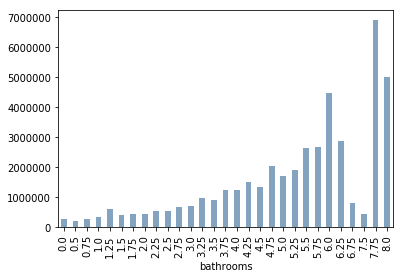

In [59]:
pricehist(all,'bathrooms','bar')

### 2.2.4 Sqft_living

### 2.2.5 Sqft_lot

### 2.2.6 Floors

### 2.2.7 Waterfront
- 그대로

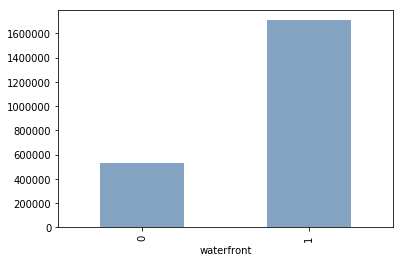

In [61]:
pricehist(all, 'waterfront','bar')

### 2.2.8 View
- 그대로

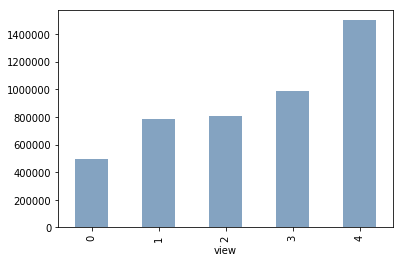

In [62]:
pricehist(all,'view','bar')

### 2.2.9 Condition
- 그대로

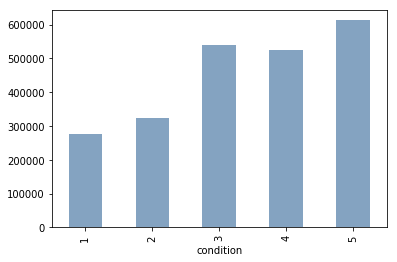

In [63]:
pricehist(all,'condition','bar')

### 2.2.10 Grade
- 그대로

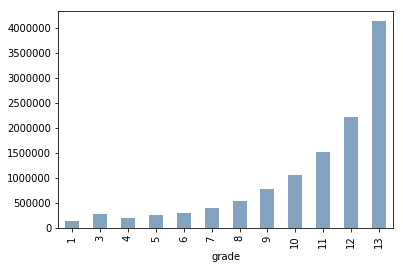

In [64]:
pricehist(all,'grade','bar')

### 2.2.11 Sqft_living15

hello


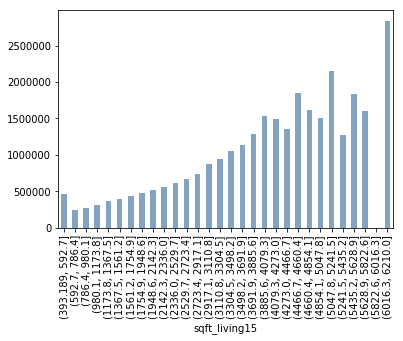

In [66]:
pricehist(all,'sqft_living15','bar')

### 2.2.12 Sqft_lot15
- 제거

hello


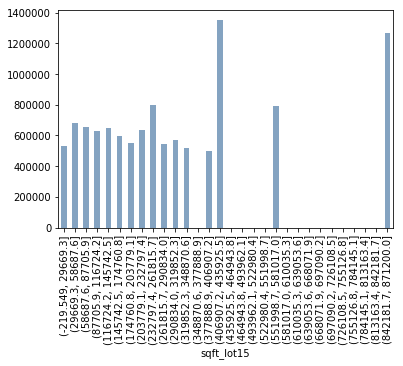

In [67]:
pricehist(all,'sqft_lot15','bar')

### 2.2.13 Sqft_above

hello


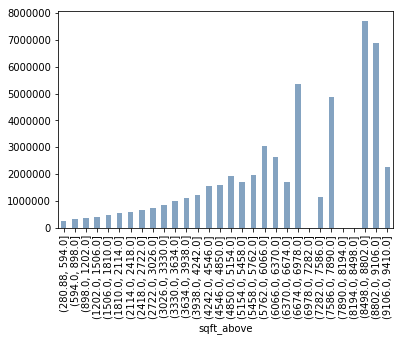

In [68]:
pricehist(all,'sqft_above','bar')

### 2.2.14 Sqft_basement

hello


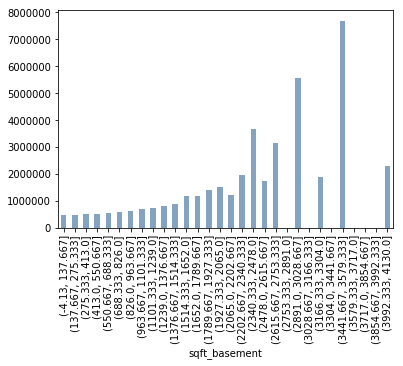

In [69]:
pricehist(all,'sqft_basement','bar')

### 2.2.15 Yr_built

hello


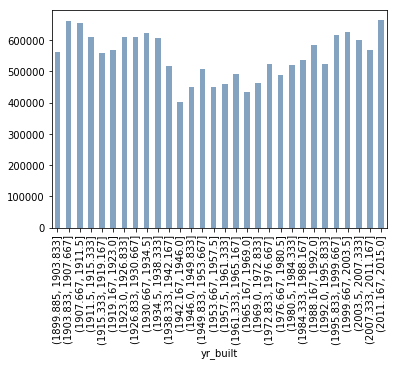

In [70]:
pricehist(all,'yr_built','bar')

### 2.2.16 Yr_renovated

hello


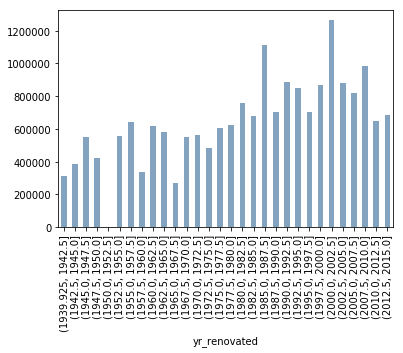

In [72]:
pricehist(all[all['yr_renovated']!=0],'yr_renovated','bar')

### 2.2.17 Lat

hello


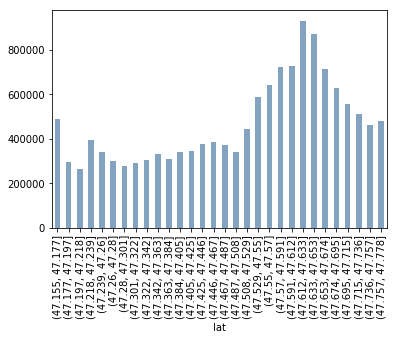

In [73]:
pricehist(all, 'lat','bar')

### 2.2.18 Long

hello


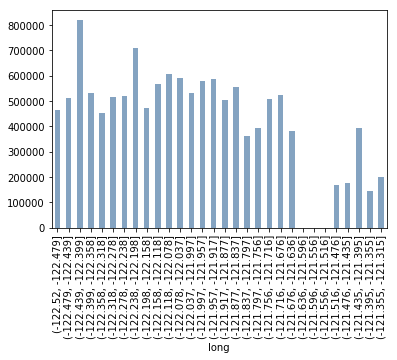

In [74]:
pricehist(all,'long','bar')

### 2.2.19 Zipcode

hello


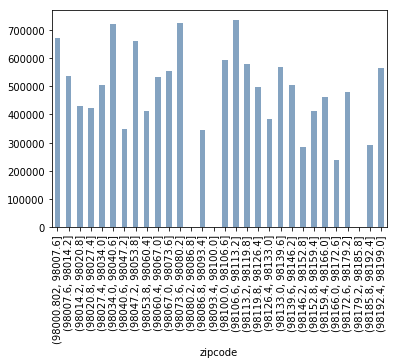

In [75]:
pricehist(all,'zipcode','bar')

# 3 Modeling

## 3.1 XGboost

In [0]:
## columns 확인
all.columns

### 3.1.0 Data Arrange


In [0]:
## all을 train과 test로 다시 나누기
train = all[all['log_price'].isnull()=False]
test = all[all['log_price'].isnull()=True]

## 다시 dataset을 x_train, y_train, x_test로 나누기
x_train = train.drop('log_price',axis=1)
y_train = trian['log_price']
x_test = test.drop('log_price',axis=1)


### 3.1.1 Parameters

In [0]:
# XGB Parameter
xgb_params = {
    'eta': 0.02,
    'max_depth': 6,
    'subample': 0.8,
    'colsample_bytree': 0.4,
    'objective': 'reg:linear',     # 회귀
    'eval_metirc': 'rmse',         # kaglle에서 요구하는 검증모델
    'silent': True                 # 학습 동안 메세지 출력 여부
}

In [0]:
# DMatrix
dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatirx(x_test)

In [0]:
# Feval(RMSE_exp)
def rmse_exp(predictions, dmat):
    labels = dmat.get_label()
    diffs = np.exp(predictions) - np.exp(labels)
    squared_diffs = np.square(diffs)
    avg = np.mean(squared_diffs)
    return ('rmse_exp', np.sqrt(avg))

### 3.1.2 Train Boosting

In [0]:
# cv_output ## -> 내 모델의 성능을 객관적으로 파악하기 위함이다. -> test-rmse가 홈페이지에 있는 값과 비슷한 것.
cv_output = xgb.cv(xgb_params,
                   dtrain,                        
                   num_boost_round=5000,         # 학습 횟수
                   early_stopping_rounds=100,    # overfitting 방지
                   nfold=5,                      # 높을 수록 실제 검증값에 가까워지고 낮을 수록 빠름
                   verbose_eval=100,             # 몇 번째마다 메세지를 출력할 것인지
                   feval=rmse_exp,               # price 속성을 log scaling 했기 때문에, 다시 exponential
                   maximize=False,
                   show_stdv=False,              # 학습 동안 std(표준편차) 출력할지 말지
                   )

In [0]:
# scoring
best_rounds = cv_output.index.size
score = round(cv_output.iloc[-1]['test-rmse_exp-mean'], 2)

print(f'\nBest Rounds: {best_rounds}')
print(f'Best Score: {score}')

### 3.1.3 Test Boosting

In [0]:
model = xgb.train(xgb_params,dtrain, num_boost_round=)
y_pred = model.predict(dtest)
y_pred = np.exp(y_pred)

# 4 Submission

## 4.1 Read Sample Submission

In [0]:
# Read the Sample submission file
sample_submission = pd.read_csv("")

## 4.2 Save Submission

In [0]:
# Change the data
submission = pd.DataFrame(data={'id':test['id'],'price':y_pred})

In [0]:
# Save the data
submission.to_csv('sub_0412_01.csv',index=False)